In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("heart_data.csv")

In [8]:
df.head()


,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [9]:
df.tail()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
292,130,2,2,62,0,97,0,0,1,263,1.2,0,1,1
293,100,3,0,58,0,122,0,0,1,248,1.0,2,0,0
294,138,3,0,59,0,182,0,1,0,271,0.0,2,0,0
295,130,3,2,56,1,103,1,1,2,283,1.6,2,0,1
296,150,3,2,50,0,128,0,1,1,243,2.6,2,0,1


In [10]:
df.shape
print("there are:",df.shape,"no of rows and columns")

there are: (297, 14) no of rows and columns


In [11]:
print("Data Cleaning")
df.info()

Data Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [12]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

In [13]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
rest_bp,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chest_pain,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
thalassemia,297.0,0.835017,0.956690,0.0,0.0,0.0,2.0,2.0
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
fasting_bs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
max_hr,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exercise_angina,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
gender,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
st_slope,297.0,0.602694,0.618187,0.0,0.0,1.0,1.0,2.0
cholesterol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0


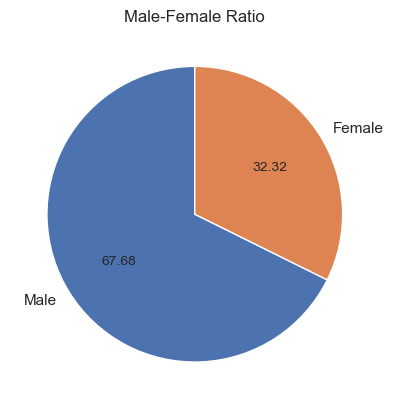

In [36]:
plt.pie(df.gender.value_counts(),labels=["Male","Female"],startangle=90,
    autopct='%.2f')
plt.title("Male-Female Ratio")
plt.show()

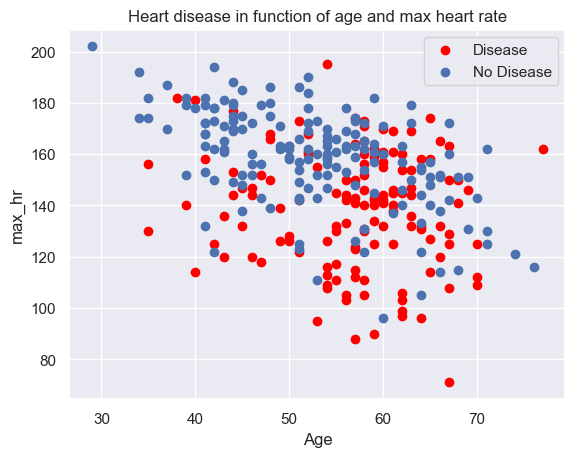

In [34]:
plt.scatter(x=df.age[df.diagnosis==1], y=df.max_hr[(df.diagnosis==1)], c="red")
plt.scatter(x=df.age[df.diagnosis==0], y=df.max_hr[(df.diagnosis==0)])
plt.title("Heart disease in function of age and max heart rate")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("max_hr")
plt.show()

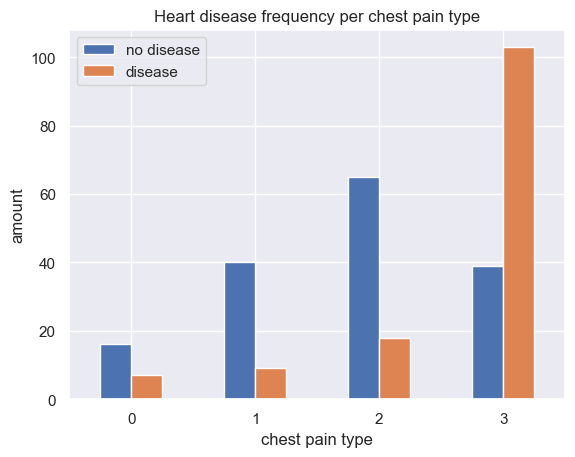

In [35]:
pd.crosstab(df.chest_pain,df.diagnosis).plot(kind="bar")
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Heat Map')

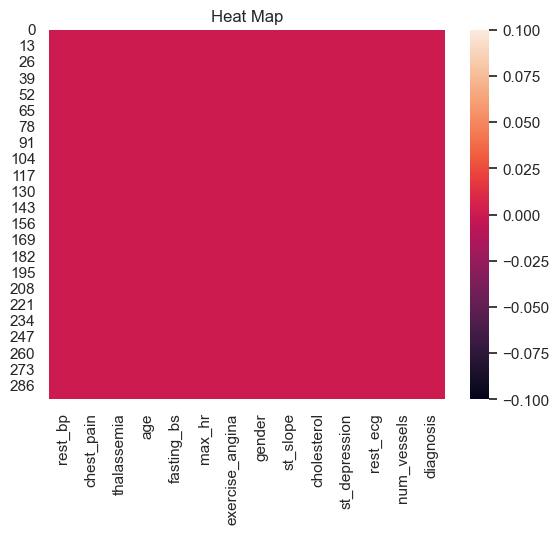

In [37]:
sns.heatmap(df.isnull())
plt.title("Heat Map")

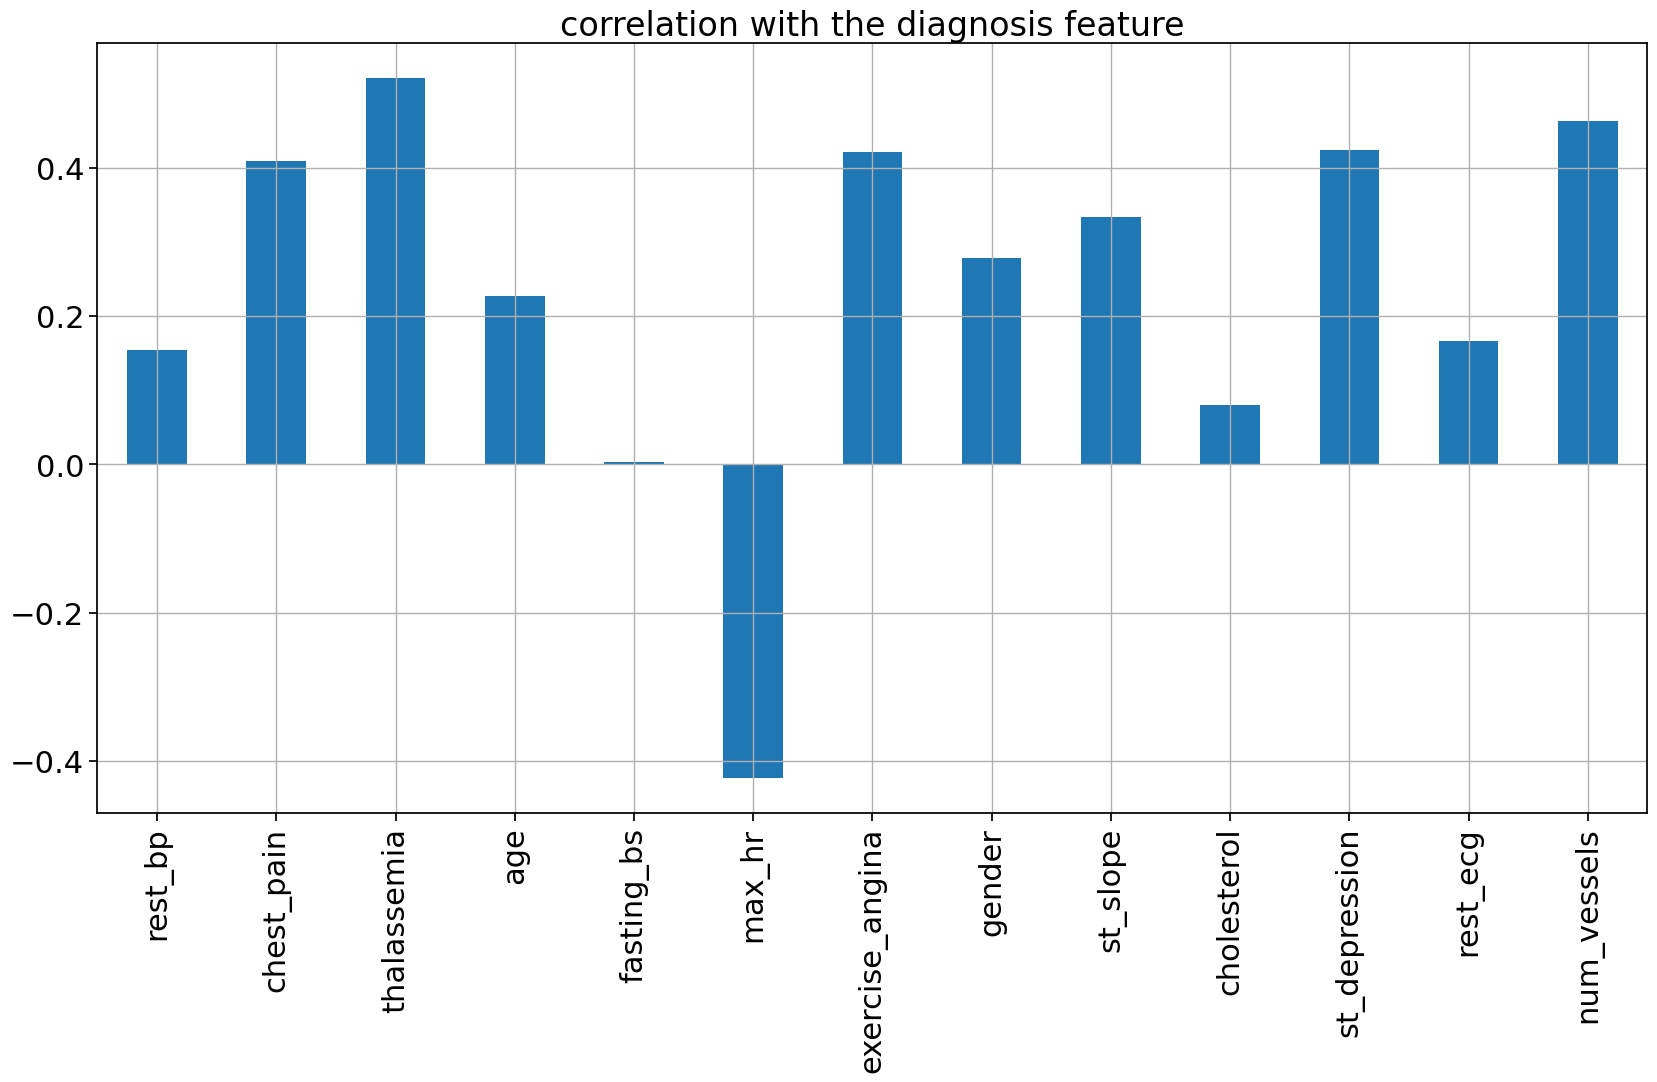

In [19]:
sns.set_context('notebook',font_scale=2) 
df.drop("diagnosis",axis=1).corrwith(df.diagnosis).plot(kind='bar',grid=True,figsize=(20,10),title="correlation with the diagnosis feature")
plt.show()

In [20]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
rest_bp,1.000000,-0.036980,0.130612,0.290476,0.180860,-0.049108,0.066691,-0.066340,0.121172,0.131536,0.191243,0.149242,0.097954,0.153490
chest_pain,-0.036980,1.000000,0.266275,0.110471,-0.057663,-0.339308,0.377525,0.008908,0.151079,0.072088,0.203244,0.063905,0.235644,0.408945
thalassemia,0.130612,0.266275,1.000000,0.120795,0.051038,-0.258386,0.323268,0.370556,0.260096,0.023441,0.336809,0.013612,0.248825,0.520516
age,0.290476,0.110471,0.120795,1.000000,0.132062,-0.394563,0.096489,-0.092399,0.159405,0.202644,0.197123,0.149917,0.362210,0.227075
fasting_bs,0.180860,-0.057663,0.051038,0.132062,1.000000,-0.007842,-0.000893,0.038850,0.047819,0.012708,0.008311,0.068831,0.152086,0.003167
max_hr,-0.049108,-0.339308,-0.258386,-0.394563,-0.007842,1.000000,-0.384368,-0.060496,-0.389307,-0.000075,-0.347640,-0.072290,-0.268727,-0.423817
exercise_angina,0.066691,0.377525,0.323268,0.096489,-0.000893,-0.384368,1.000000,0.143581,0.250572,0.059339,0.289310,0.081874,0.148232,0.421355
gender,-0.066340,0.008908,0.370556,-0.092399,0.038850,-0.060496,0.143581,1.000000,0.033345,-0.198089,0.106567,0.033897,0.091925,0.278467
st_slope,0.121172,0.151079,0.260096,0.159405,0.047819,-0.389307,0.250572,0.033345,1.000000,-0.009215,0.579037,0.135141,0.109761,0.333049
cholesterol,0.131536,0.072088,0.023441,0.202644,0.012708,-0.000075,0.059339,-0.198089,-0.009215,1.000000,0.038596,0.165046,0.115945,0.080285


C:\Users\DELL\AppData\Local\Temp\ipykernel_16284\1994431419.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"],bins=12);


Text(0.5, 1.0, 'Age Distplot')

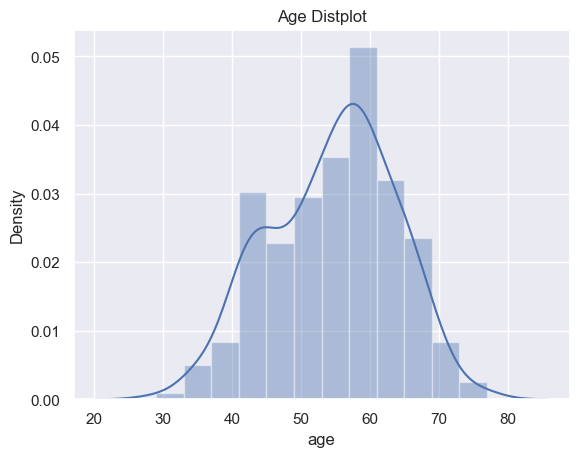

In [38]:
sns.distplot(df["age"],bins=12);
sns.set(rc={'font.size':10})
plt.title("Age Distplot")

C:\Users\DELL\AppData\Local\Temp\ipykernel_16284\1631815422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cholesterol);


Text(0.5, 1.0, 'Cholestrol Distplot')

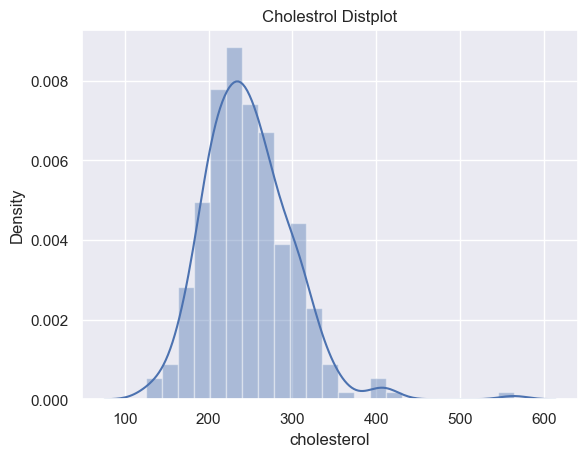

In [39]:
sns.distplot(df.cholesterol);
sns.set(rc={'font.size':10})
plt.title("Cholestrol Distplot")

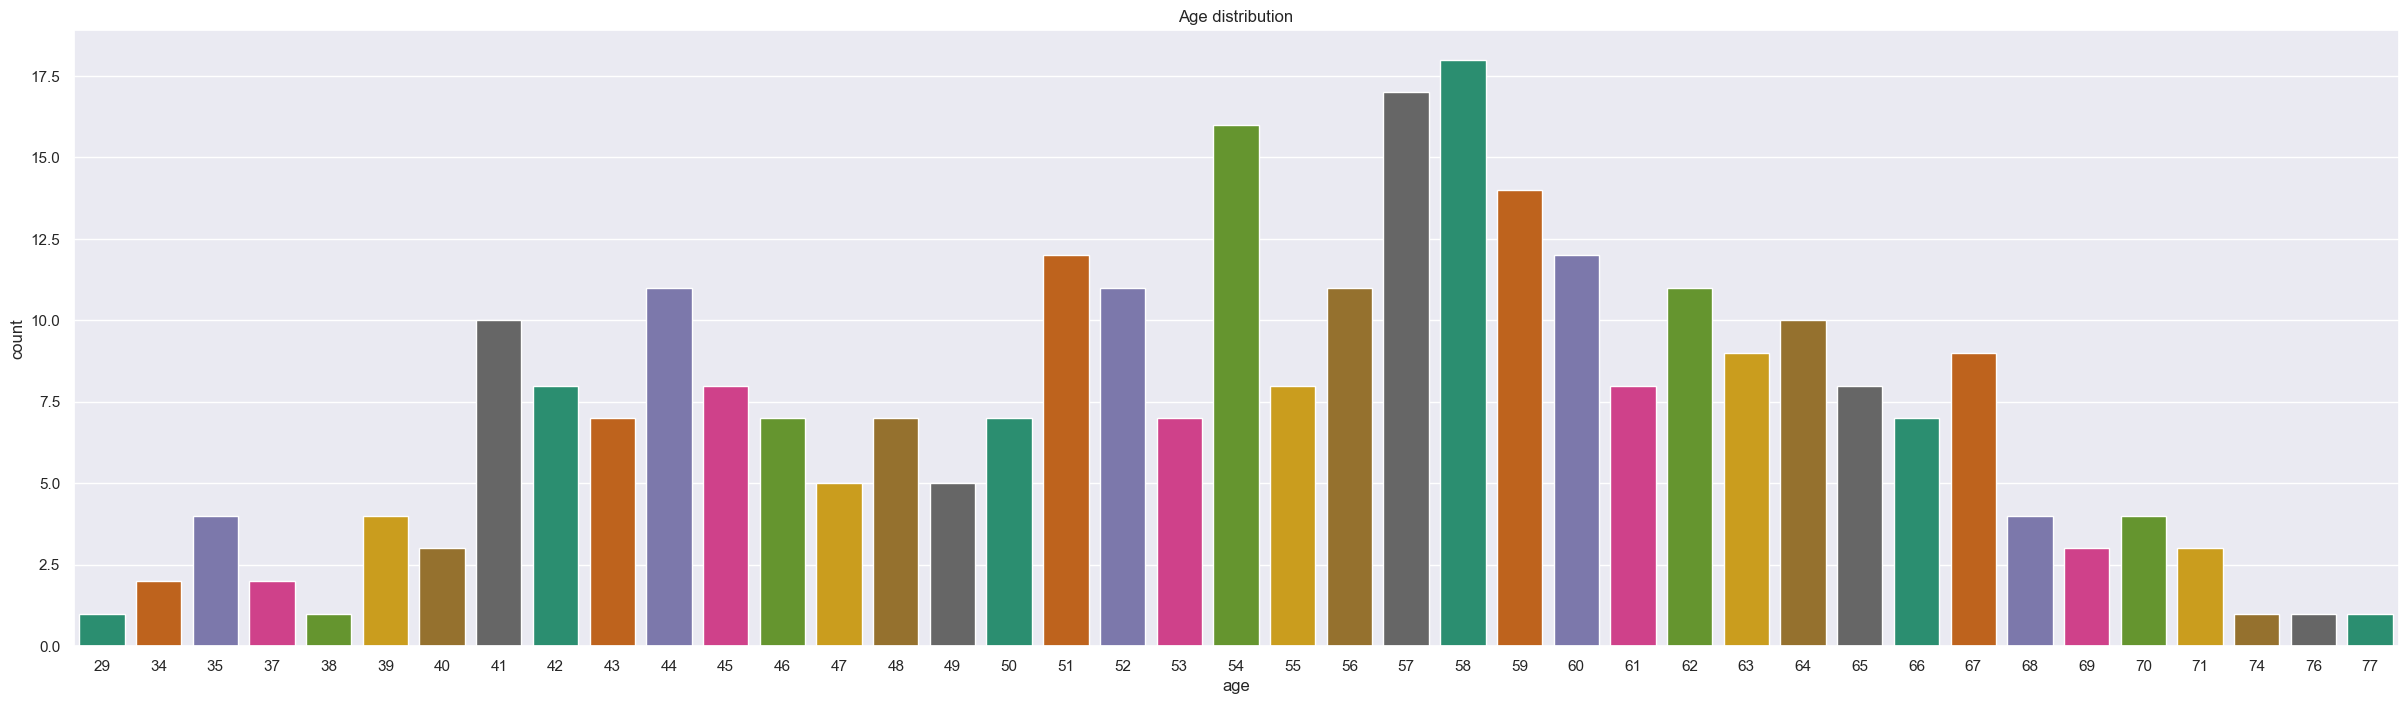

In [40]:
plt.figure(figsize=(30, 8))
sns.countplot(df , x= df["age"], palette='Dark2')
plt.title("Age distribution")
plt.show()

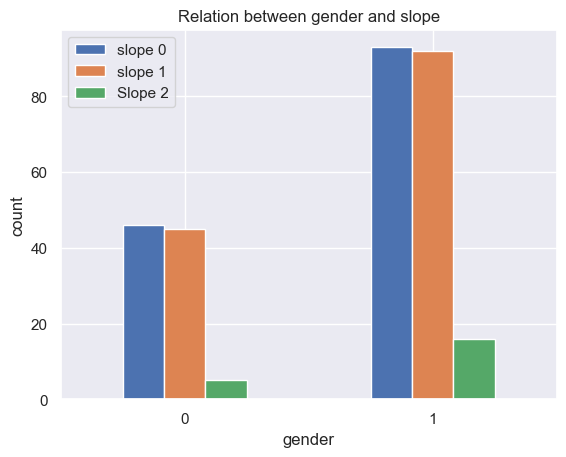

In [32]:
pd.crosstab(df.gender,df.st_slope).plot(kind="bar")
plt.title("Relation between gender and slope")
plt.xlabel("gender")
plt.ylabel("count")
plt.legend(["slope 0","slope 1","Slope 2"])
plt.xticks(rotation=0)
sns.set(rc={'font.size':10})
plt.show()


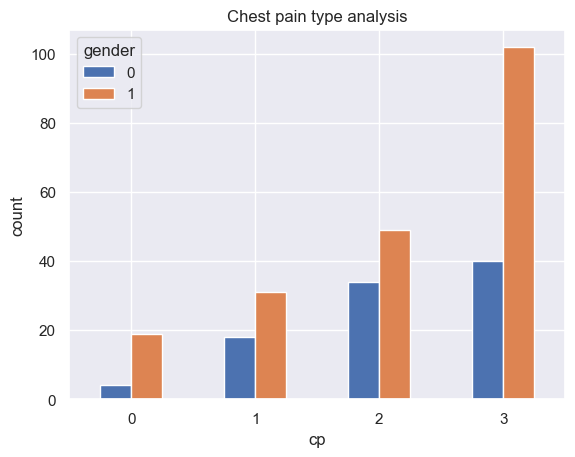

In [33]:
pd.crosstab(df.chest_pain,df.gender).plot(kind="bar")
plt.title("Chest pain type analysis")
plt.xlabel("cp")
plt.ylabel("count")
plt.xticks(rotation=0)
sns.set(rc={'font.size':10})
plt.show()